In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
from my_util import coor_iauname
from PIL import Image

In [3]:
#MGS_out_DECaLS catalog
merger=pd.read_csv('MGS_out_DECaLS_merger.csv')
merger.head(5)
fname=merger.fname
pnomerge=merger.nomerge_confidence
pmerge=merger.merger_confidence
Ngal=len(fname)
print(Ngal,'galaxies in this catalog')
Ra=np.zeros(Ngal)
Dec=np.zeros(Ngal)
for i in range(Ngal):
    Ra[i],Dec[i],_,_,_=fname[i].split('_')

463409 galaxies in this catalog


17212 new mergers
3208 mergers in GZ DECaLS


Text(0, 70, 'mergers in DCEcaLS')

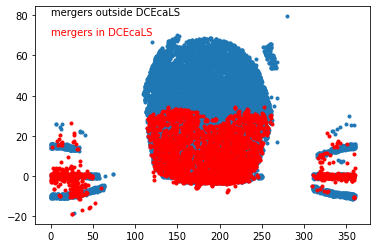

In [4]:
#mergers outside DECaLS
sel=np.where(pmerge > 0.9)
Nsel=len(sel[0])
print(Nsel,'new mergers')
RaM=Ra[sel]
DecM=Dec[sel]
plt.plot(RaM,DecM,'.')
plt.text(0,80,'mergers outside DCEcaLS')

# merges in DECaLS
merge=np.load('merge_ra_dec_post.npy')
Ra1=merge[:,0]
Dec1=merge[:,1]
RaD_M=np.array([float(e) for e in Ra1])
DecD_M=np.array([float(e) for e in Dec1])
print(len(Ra1),'mergers in GZ DECaLS')
plt.plot(RaD_M,DecD_M,'.',color='red')
plt.text(0,70,'mergers in DCEcaLS',color='red')

384178 non-mergers in MGS_out_DECaLS
310579 non-mergers in GZ DECaLS


Text(0, 70, 'non-mergers in DCEcaLS')

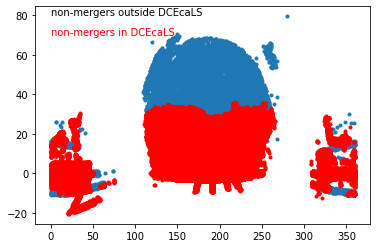

In [5]:
#non-mergers outside DECaLS
sel=np.where(pmerge < 0.1)
Nsel=len(sel[0])
print(Nsel,'non-mergers in MGS_out_DECaLS')
RaN=Ra[sel]
DecN=Dec[sel]
plt.plot(RaM,DecM,'.')
plt.text(0,80,'non-mergers outside DCEcaLS')

# non-merges in DECaLS
nomerge=np.load('nomerge.npy')
Ra1=nomerge[:,0]
Dec1=nomerge[:,1]
RaD_N=np.array([float(e) for e in Ra1])
DecD_N=np.array([float(e) for e in Dec1])
print(len(Ra1),'non-mergers in GZ DECaLS')
plt.plot(RaD_N,DecD_N,'.',color='red')
plt.text(0,70,'non-mergers in DCEcaLS',color='red')

In [6]:
#match with VAGC catalog
hdus=fits.open('VAGC_MGS-m14_1777--20180116.fits')
#hdus.info()
VAGC=hdus[1].data
RaV=VAGC.RA
DecV=VAGC.DEC
redshift=VAGC.Z
mmag=VAGC.MODELMAG

# match GZ DECaLS megers with VAGC
C0 = SkyCoord(RaD_M*u.degree,DecD_M*u.degree) # DECaLS catalog
Cat = SkyCoord(RaV*u.degree,DecV*u.degree) 
idx, d2d, d3d = C0.match_to_catalog_sky(Cat)
sel=np.where(d2d.degree < 0.0001) 
print(len(sel[0]),'GZ DECaLS mergers matched with VAGC')
zD_N=redshift[sel]
mmagD_N=mmag[sel]

# match GZ DECaLS non-megers with VAGC
C1 = SkyCoord(RaD_N*u.degree,DecD_N*u.degree) # DECaLS catalog
idx, d2d, d3d = C1.match_to_catalog_sky(Cat)
sel=np.where(d2d.degree < 0.0001) 
print(len(sel[0]),'GZ DECaLS non-mergers matched with VAGC')
zD_M=redshift[sel]
mmagD_M=mmag[sel]

# match mew identified megers with VAGC
C2=SkyCoord(RaM*u.degree,DecM*u.degree) # new merger catalog
idx, d2d, d3d = C2.match_to_catalog_sky(Cat)
sel=np.where(d2d.degree < 0.0001) 
print(len(sel[0]),'new outside DECaLS mergers matched with VAGC')
zM=redshift[sel]
mmagM=mmag[sel]
# match non-mergers with VAGC
C3=SkyCoord(RaN*u.degree,DecN*u.degree) # new merger catalog
idx, d2d, d3d = C3.match_to_catalog_sky(Cat)
sel=np.where(d2d.degree < 0.0001) 
print(len(sel[0]),'non-megers (outside DECaLS) matched with VAGC')
zN=redshift[sel]
mmagN=mmag[sel]

2397 GZ DECaLS mergers matched with VAGC
239499 GZ DECaLS non-mergers matched with VAGC
17212 new outside DECaLS mergers matched with VAGC
384178 non-megers (outside DECaLS) matched with VAGC


In [7]:
# the basic histrograms(redshift and mag) of mergers VS non-mergers

plt.figure(figsize=(12,5))
# redshift
plt.subplot(1,2,1)
plt.hist(zD_M,density=1,bins=np.arange(20)*0.015,label='DECaLS merger')
plt.hist(zM,density=1,bins=np.arange(20)*0.015,label='Out DECaLS merger')
plt.xlabel('redshift')
plt.hist(zD_N,density=1,bins=np.arange(20)*0.015,histtype='step',label='DECaLS non-merger')
plt.hist(zN,density=1,bins=np.arange(20)*0.015,histtype='step',label='Out DECaLS non-merger')
plt.xlabel('redshift')
plt.ylim(0,15)
plt.legend(loc='upper left')

#mag 
plt.subplot(1,2,2)
plt.hist(mmagD_M[:,2],density=1,bins=np.arange(20)*0.2+14,label='DECaLS merger')
plt.hist(mmagM[:,2],density=1,bins=np.arange(20)*0.2+14,label='Out DECaLS merger')
plt.hist(mmagD_N[:,2],density=1,bins=np.arange(20)*0.2+14,histtype='step',label='DECaLS non-merger')
plt.hist(mmagN[:,2],density=1,bins=np.arange(20)*0.2+14,histtype='step',label='Out DECaLS non-merger')
plt.xlabel('rmag')
plt.legend(loc='upper left')

In [8]:
#plot histograms of more physical properties: mergers VS non-mergers
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.hist(mmagD_M[:,1]-mmagD_M[:,2],density=1,bins=np.arange(30)*0.05,
         label='DECaLS Meger')
plt.hist(mmagD_N[:,1]-mmagD_N[:,2],density=1,bins=np.arange(30)*0.05,
histtype='step',label='DECaLS Non-Merger')
plt.xlabel('g-r')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.hist(mmagM[:,1]-mmagM[:,2],density=1,bins=np.arange(30)*0.05,
         label='Out DECaLS Merger')
plt.hist(mmagN[:,1]-mmagN[:,2],density=1,bins=np.arange(30)*0.05,
         histtype='step',label='Out DECaLS Non-Merger')
plt.xlabel('g-r')
plt.legend(loc='upper left')

In [9]:
from Y07_group import Ygroup
Y07=Ygroup()
RaY=Y07.Ra
DecY=Y07.Dec
YCat = SkyCoord(RaY*u.degree,DecY*u.degree) 

# C0 is DECaLS mergers
idx, d2d, d3d = C0.match_to_catalog_sky(YCat)
sel=np.where(d2d.degree < 0.0001)
NDM=len(sel[0])
print(NDM,'DECaLS mergers matched with Y07')
DM_gro=Y07.gal_GroID[sel]
DM_Mhalo=Y07.Mhalo[DM_gro]
DM_MMG=Y07.gal_IMMG[sel]
fMMG=len(np.where(DM_MMG ==1)[0])/NDM
print(fMMG,' fraction is MMG')

# C1 is DECaLS non-mergers
idx, d2d, d3d = C1.match_to_catalog_sky(YCat)
sel=np.where(d2d.degree < 0.0001)
NDN=len(sel[0])
print(NDN,'DECaLS non-mergers matched with Y07')
DN_gro=Y07.gal_GroID[sel]
DN_Mhalo=Y07.Mhalo[DN_gro]
DN_MMG=Y07.gal_IMMG[sel]
fMMG=len(np.where(DN_MMG ==1)[0])/NDN
print(fMMG,' fraction is MMG')

#C2 is Non-DECaLS merges
idx, d2d, d3d = C2.match_to_catalog_sky(YCat)
sel=np.where(d2d.degree < 0.0001)
NNM=len(sel[0])
print(NNM,'non DECaLS mergers matched with Y07')
NM_gro=Y07.gal_GroID[sel]
NM_Mhalo=Y07.Mhalo[NM_gro]
NM_MMG=Y07.gal_IMMG[sel]
fMMG=len(np.where(NM_MMG == 1)[0])/NNM
print(fMMG,' fraction is MMG')

#C3 is Non-DECaLS non-merges
idx, d2d, d3d = C3.match_to_catalog_sky(YCat)
sel=np.where(d2d.degree < 0.0001)
NNNM=len(sel[0])
print(NNM,'non DECaLS non-mergers matched with Y07')
NN_gro=Y07.gal_GroID[sel]
NN_Mhalo=Y07.Mhalo[NN_gro]
NN_MMG=Y07.gal_IMMG[sel]
fMMG=len(np.where(NN_MMG==1)[0])/NNNM
print(fMMG,' fraction is MMG')

2069 DECaLS mergers matched with Y07
0.7883035282745288  fraction is MMG
203407 DECaLS non-mergers matched with Y07
0.7870181458848515  fraction is MMG
13504 non DECaLS mergers matched with Y07
0.7754739336492891  fraction is MMG
13504 non DECaLS non-mergers matched with Y07
0.782826720717045  fraction is MMG


In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.hist(DM_Mhalo,bins=np.arange(20)*0.2+11,density=1,label='DECaLS Merger, fcent=0.79')
plt.hist(DN_Mhalo,bins=np.arange(20)*0.2+11,density=1,histtype='step',label='DECaLS non-Merger,fcent=0.79')
plt.ylim(0,0.8)
plt.xlabel('$log M_{halo}$')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
plt.hist(NM_Mhalo,bins=np.arange(20)*0.2+11,density=1,label='out DECaLS Merger, fcent=0.78')
plt.hist(NN_Mhalo,bins=np.arange(20)*0.2+11,density=1,histtype='step',label='out DECaLS non-Merger,fcent=0.78')
plt.ylim(0,0.8)
plt.xlabel('$log M_{halo}$')
plt.legend(loc='upper left')

In [11]:
#now check with GSWLC catalog
# https://salims.pages.iu.edu/gswlc/
GSWLC_dat = np.loadtxt('GSWLC-X2.dat', unpack=True)
GSWLC_dat = pd.DataFrame(GSWLC_dat.T)
GSWLC_dat.columns = ['OBJID', 'GLXID', 'PLATE', 'MJD', 'FIBERID', 'RA', 'DEC', 'Z', 'SED_fit',
                     'LogMASS', 'LogMASS_err', 'LogSFR', 'LogSFR_err', 'A_FUV', 'A_FUV_err',
                     'A_B', 'A_B_err', 'A_V', 'A_V_err', 'flag_sed', 'UV_survey', 'flag_uv', 
                     'flag_midir', 'flag_mgs']

Ra_GS=GSWLC_dat.RA
Dec_GS=GSWLC_dat.DEC
Mass=GSWLC_dat.LogMASS.values
SFR=GSWLC_dat.LogSFR.values
GSCat = SkyCoord(Ra_GS*u.degree,Dec_GS*u.degree)

# C0 is DECaLS mergers
idx, d2d, d3d = C0.match_to_catalog_sky(GSCat)
sel=np.where(d2d.degree < 0.0001)
NDM=len(sel[0])
print(NDM,'DECaLS mergers matched with GSWLC')
DM_Mass=Mass[sel]
DM_SFR=SFR[sel]
DM_SSFR=DM_SFR-DM_Mass

# C1 is DECaLS non-mergers
idx, d2d, d3d = C1.match_to_catalog_sky(GSCat)
sel=np.where(d2d.degree < 0.0001)
NDN=len(sel[0])
print(NDN,'DECaLS non mergers matched with GSWLC')
DN_Mass=Mass[sel]
DN_SFR=SFR[sel]
DN_SSFR=DN_SFR-DN_Mass

#C2 is Non-DECaLS merges
idx, d2d, d3d = C2.match_to_catalog_sky(GSCat)
sel=np.where(d2d.degree < 0.0001)
NNM=len(sel[0])
print(NNM,'non DECaLS mergers matched with GSWKC')
NM_Mass=Mass[sel]
NM_SFR=SFR[sel]
NM_SSFR=NM_SFR-NM_Mass

#C3 is Non-DECaLS non-merges
idx, d2d, d3d = C3.match_to_catalog_sky(GSCat)
sel=np.where(d2d.degree < 0.0001)
NNNM=len(sel[0])
print(NNNM,'non DECaLS non-mergers matched with GSWLC')
NNM_Mass=Mass[sel]
NNM_SFR=SFR[sel]
NNM_SSFR=NNM_SFR-NNM_Mass 

2112 DECaLS mergers matched with GSWLC
225251 DECaLS non mergers matched with GSWLC
11156 non DECaLS mergers matched with GSWKC
295132 non DECaLS non-mergers matched with GSWLC


In [12]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(DM_SSFR,bins=np.arange(20)*0.25-14,density=1,label='DECaLS Merger')
plt.hist(DN_SSFR,bins=np.arange(20)*0.25-14,density=1,histtype='step',label='DECaLS non-Merger')
plt.xlabel('log SSFR ')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.hist(NM_SSFR,bins=np.arange(20)*0.25-14,density=1,label='out DECaLS Merger')
plt.hist(NNM_SSFR,bins=np.arange(20)*0.25-14,density=1,histtype='step',label='out DECaLS non-Merger')
plt.xlabel('log SSFR ')
plt.legend(loc='upper left')

In [85]:
#show images of 10 galaxies using function convert 3-channel fits image to real-color png 
def show_galaxies(df, start_index=0, crop_size=50):
    fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(12, 5))
    all_axes = [ax for row in axes for ax in row]
    for n in range(10):
        galaxy = df[start_index+n]
        image_data = fits.open(galaxy)
        dataImage = image_data[0].data.T
        #print(dataImage.shape)
        Imax=np.max(dataImage,axis=(0,1))
        Imin=np.min(dataImage,axis=(0,1))
        img = ((dataImage-Imin)/(Imax-Imin)*255.0).astype(np.uint8)
        im = Image.fromarray(img)
        #.crop((50, 50, 256-crop_size, 256-crop_size))
        ax = all_axes[n]
        ax.imshow(im)
        #ax.set_title(str(n))
        ax.axis(False)
    fig.tight_layout()


10 radnom selected DECaLS merge galaxies


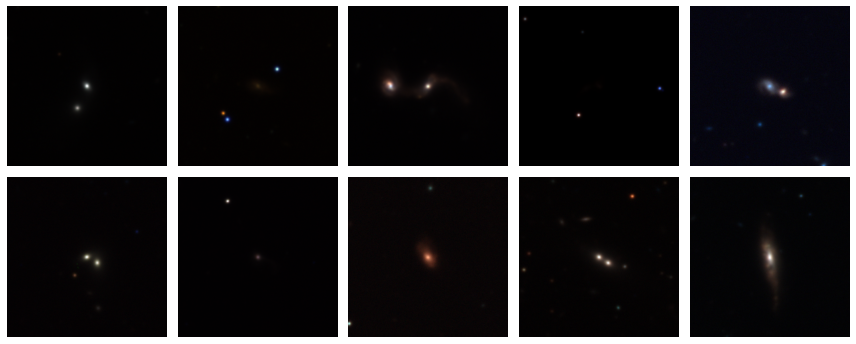

In [86]:
#example images of mergers in DECaLS
data = np.load("merge_ra_dec_post.npy", allow_pickle=True)
filepath='/data/GZ_Decals/merge/'

DM_file=[]
count = 0
while count < 10:
    Isel=int(len(data)*np.random.rand())
    line=data[Isel]
    # this name criteria is from CHEN_MI
    if float(line[5]) > 0.7:
        info=[line[0], line[1], line[2:5], "merger", 0]
    elif float(line[4]) > 0.6:
        info=[line[0], line[1], line[2:5], "post-merger", 1]
    elif float(line[3]) > 0.4:
        info=[line[0], line[1], line[2:5], "asymmetric-low", 2]
    else:
        info=[line[0], line[1], line[2:5], "none", 3]
    
    filename=str(info[0]) + '_' + str(info[1]) + '_' + str(info[4])+'.fits'
    if not os.path.exists(filepath+filename):
        print(filename,'not exist')
    else:
        count = count +1 
        DM_file.append(filepath+filename)
        
show_galaxies(DM_file)
print(10,'radnom selected DECaLS merge galaxies')

In [87]:
#example images of non-mergers in DECaLS
filepath='/data/GZ_Decals/nomerge/'
data = np.load("nomerge.npy", allow_pickle=True)
count=0
DN_file=[]
while count < 10:
    Isel=int(len(data)*np.random.rand())
    info=data[Isel]
    filename=str(info[0]) + '_' + str(info[1]) + '_' + str(info[3])+'.fits'
    if not os.path.exists(filepath+filename):
        print(filename,'not exist')
        count = count +1
    else:
        DN_file.append(filepath+filename)
        count=count+1
        
show_galaxies(DN_file)
print(10,'radnom selected DECaLS non-merge galaxies')

10 radnom selected DECaLS non-merge galaxies


194.95500386082875_34.172362917151894_0.262_grz_.fits not exist
158.43245786840475_62.18507844466952_0.262_grz_.fits not exist
215.58474314461677_42.591125367863654_0.262_grz_.fits not exist
156.73240688294635_53.6188885175535_0.262_grz_.fits not exist
198.5507918877288_46.51196483416256_0.262_grz_.fits not exist
192.29439310078067_48.08092364895377_0.262_grz_.fits not exist
126.72419455883787_16.997805392715428_0.262_grz_.fits not exist
121.61039091496933_50.12089208970235_0.262_grz_.fits not exist
238.2941139895449_56.84952658911078_0.262_grz_.fits not exist
156.93524186932598_26.775417649993262_0.262_grz_.fits not exist
152.8321969454832_34.62068617681915_0.262_grz_.fits not exist
139.05134326375895_50.0443606295169_0.262_grz_.fits not exist
120.66084921776783_48.539299471812626_0.262_grz_.fits not exist
216.13916309153666_50.09999808973654_0.262_grz_.fits not exist
random 10 images of new mergers outside DECaLS


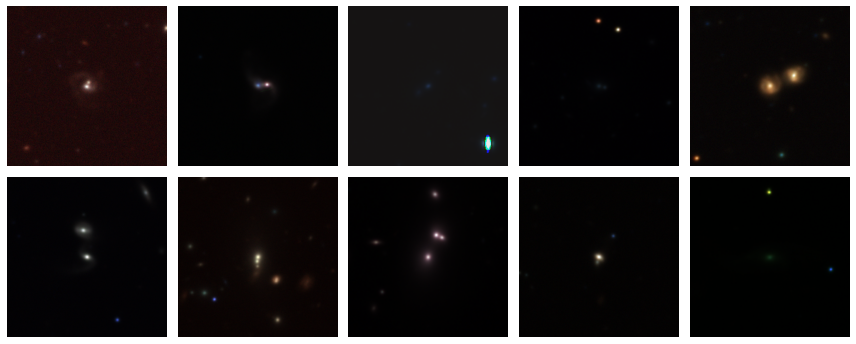

In [88]:
# show new merges 
# ! why some galaxies not in MGS_out_DECaLS list?
fname=merger.fname
sel=np.where(pmerge > 0.9)
fname=fname[sel[0]].values
NM_file=[]
filepath='/data/GZ_Decals/MGS_out_DECaLS/'
count=0
while count < 10:
    Isel=int(len(fname)*np.random.rand())
    filename=fname[Isel].replace('.png','.fits')
    if not os.path.exists(filepath+filename):
        print(filename,'not exist')
        #count = count +1
    else:
        NM_file.append(filepath+filename)
        count=count+1
show_galaxies(NM_file)
print('random 10 images of new mergers outside DECaLS')

In [89]:
# show new non-merges 
# ! why some galaxies not in MGS_out_DECaLS list?
fname=merger.fname
sel=np.where(pmerge < 0.1)
fname=fname[sel[0]].values
NN_file=[]
filepath='/data/GZ_Decals/MGS_out_DECaLS/'
count=0
while count < 10:
    Isel=int(len(fname)*np.random.rand())
    filename=fname[Isel].replace('.png','.fits')
    if not os.path.exists(filepath+filename):
        print(filename,'not exist')
        #count = count +1
    else:
        NN_file.append(filepath+filename)
        count=count+1
show_galaxies(NN_file)
print('random 10 images of non-mergers outside DECaLS')

131.761385246399_46.66933807882575_0.262_grz_.fits not exist
243.17434481947143_48.801631802110336_0.262_grz_.fits not exist
162.13999696713012_47.98741905261828_0.262_grz_.fits not exist
167.91763348246636_55.19491440243025_0.262_grz_.fits not exist
195.9466969220773_34.68316594305624_0.262_grz_.fits not exist
138.58530348910102_54.32246626192994_0.262_grz_.fits not exist
165.8095678007848_43.181598917695545_0.262_grz_.fits not exist
159.54956824491921_39.75029408315301_0.262_grz_.fits not exist
251.22464402329126_41.21827999373918_0.262_grz_.fits not exist
random 10 images of non-mergers outside DECaLS


In [67]:
#preds_loc='gz_decals_auto_posteriors.parquet'
#preds = pd.read_parquet(preds_loc)
#preds.merging_merger_fraction
#preds_merge = pd.read_parquet(preds_loc, columns=['merging_merger_fraction','iauname'])


In [135]:
CC = SkyCoord(Ra*u.degree,Dec*u.degree) #  Rupesh catalog
idx, d2d, d3d = CC.match_to_catalog_sky(Cat)
#sel=np.where(d2d.degree < 0.0001) 
#print(len(sel[0]),'Rupesh catalog matched with VAGC')
out_D=VAGC[idx]
df=pd.DataFrame({'Ra':out_D.RA,'Dec':out_D.DEC,'Z':out_D.Z,'mag_u':out_D.MODELMAG[:,0],\
    'mag_g':out_D.MODELMAG[:,1],'mag_r':out_D.MODELMAG[:,2],'mag_i':out_D.MODELMAG[:,3],\
        'mag_z':out_D.MODELMAG[:,0]})
df.to_csv('MGS_out_DECaLS_data.csv',index=False)